# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the  **Customer Data**

In [2]:
customer_df = pd.read_csv('C://Users/krivijay/OneDrive - Hewlett Packard Enterprise/Desktop/Vijay/Personal/Zeotap-Intermship-Data Science/Dataset/Customers.csv')
customer_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


# Data Description:
The input dataset has the following four attributes:

1. CustomerID: A unique token representing a customer request.
2. CustomerName: represent the name of the customer who bought the product.
3. Region: customer location indicates from where the customers are placed while placed the orders.
4. SignupDate: contains date and time of the customer when placed.

In [3]:
# Check for the dataset columns and datatypes
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
# Check for summary statistics
customer_df.describe(include='all')


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [5]:
# Check the number of NaN values for each column
customer_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
# Check the CustomerID for which drop SignupDate is not available
customer_df[customer_df['SignupDate'].isnull()]['CustomerID'].value_counts()


Series([], Name: CustomerID, dtype: int64)

In [7]:
#check for duplicates
customer_df.duplicated().sum()
customer_df[customer_df.duplicated()]
#Remove Duplicate
#df.drop_duplcates(inplace = True)

,CustomerID,CustomerName,Region,SignupDate


In [8]:
#Check for column names
customer_df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [9]:
#Check and Drop NA
customer_df.dropna(inplace = True)

In [10]:
#check column names vertically
for col in customer_df.columns:
    print(col)

CustomerID
CustomerName
Region
SignupDate


#  Customer Data Cleaning and Manipulation

In [11]:
# Converting SignupDate to datetime value from object datatype
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'],dayfirst=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [12]:
from datetime import datetime

date_str = "2023-06-15"  # Your date string
date_obj = datetime.strptime(date_str, "%Y-%m-%d")

# Get month and year as strings
month_year_str = date_obj.strftime("%B %Y")
month_str = date_obj.strftime("%m")
year_str = date_obj.strftime("%Y")

print(month_year_str)


June 2023


In [13]:
#Creat customized date for Year to later analysis
customer_df['Signup Year'] = customer_df['SignupDate'].dt.year
customer_df.head(10)

,CustomerID,CustomerName,Region,SignupDate,Signup Year
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022
5,C0006,Brittany Palmer,South America,2024-01-07,2024
6,C0007,Paul Graves,Asia,2022-06-18,2022
7,C0008,David Li,North America,2024-01-13,2024
8,C0009,Joy Clark,Europe,2023-08-14,2023
9,C0010,Aaron Cox,Europe,2022-12-15,2022


In [14]:
# Delete the 'Request Month Columns ' column
#customer_df.drop('Request Month', axis=1, inplace=True)

In [15]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate,Signup Year
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022


#  Customer Data Analysis

In [16]:
# Idenitfy the frequency of region
status_group_df = pd.DataFrame(customer_df.groupby('Region').size()).reset_index().rename(columns={0:'Number of Requests'})
total_num_requests = status_group_df['Number of Requests'].sum()
status_group_df['Percentage of Total Request'] = round((status_group_df['Number of Requests']/total_num_requests)*100,2)
status_group_df

,Region,Number of Requests,Percentage of Total Request
0,Asia,45,22.5
1,Europe,50,25.0
2,North America,46,23.0
3,South America,59,29.5


#  Customer Data Business Insights:
    #Plot 1: Total number of customer signed up upon Region wise and out from which "South America" has around 30% volume signed               up and the around "59" number of customer signed when compared among other region.
    #Plot 2: Customer wise the total number of sign in.
    #Plot 3: customized SignupDate to check on which year more number of the customer signed in.

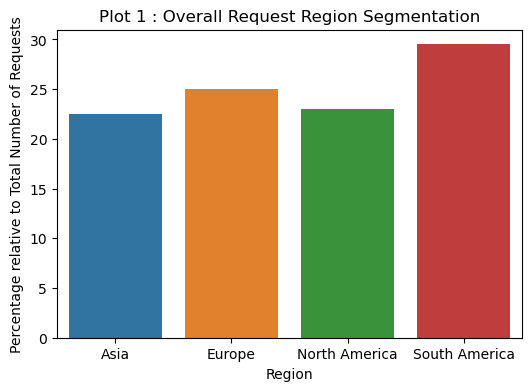

In [17]:
# Visualize the above observation
plt.figure(figsize=(6,4))

ax = sns.barplot(data=status_group_df,x='Region',y='Percentage of Total Request')
ax.set_title('Plot 1 : Overall Request Region Segmentation',fontsize=12)
ax.set_ylabel("Percentage relative to Total Number of Requests",fontsize=10)
ax.tick_params(labelsize=10)
plt.show()

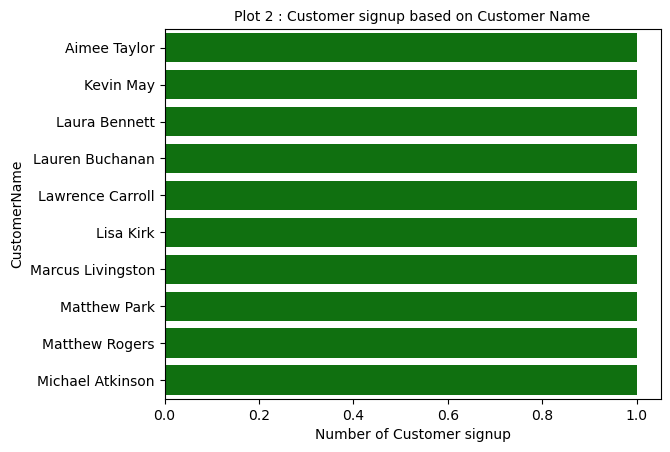

In [18]:
# Check the top 10 customers with most recent sign up.
cust = pd.DataFrame(customer_df[customer_df.Region=='South America'].groupby('CustomerName').size()).reset_index().rename(columns={0:'Number of Customer signup'})
top_10_customer_signup = cust.sort_values('Number of Customer signup',ascending =True).head(10)

ax = sns.barplot(data=top_10_customer_signup,y='CustomerName',x='Number of Customer signup',color='g')
ax.set_title('Plot 2 : Customer signup based on Customer Name',fontsize=10)
plt.show()


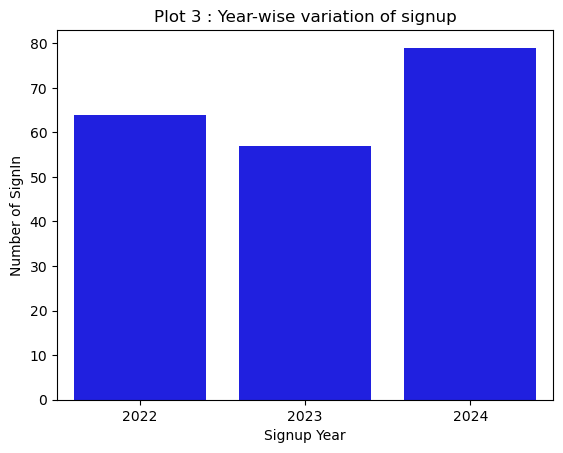

In [19]:
# Year-wise variation of signup
ax = sns.countplot(data=customer_df,x='Signup Year',color='b')
ax.set_title('Plot 3 : Year-wise variation of signup',fontsize=12)
ax.set_ylabel('Number of SignIn')
plt.show()

# Import the  **Products Data**

In [20]:
#Load product Report
product_df = pd.read_csv('C://Users/krivijay/OneDrive - Hewlett Packard Enterprise/Desktop/Vijay/Personal/Zeotap-Intermship-Data Science/Dataset/Products.csv')
product_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


Product Data Description:
The input dataset has the following 4 attributes:

ProductID: A unique ID code representing a product.
ProductName: Represent the name of the Product indicate.
Category: Product description where customer place based on their requirement.
Price: Represnting the cost for the particular product.

In [21]:
#check Null Values
product_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [22]:
#checking Duplciates
product_df.duplicated().sum()

0

In [23]:
# DropNA
product_df.dropna()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [24]:
#Rows and columns
product_df.shape

(100, 4)

# Product Data Cleaning and Manipulation

In [25]:
# Convert the 'Price' column from float to int
product_df['Price'] = product_df['Price'].astype(int)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    100 non-null    object
 1   ProductName  100 non-null    object
 2   Category     100 non-null    object
 3   Price        100 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 2.9+ KB


In [26]:
product_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169
1,P002,ActiveWear Smartwatch,Electronics,346
2,P003,ComfortLiving Biography,Books,44
3,P004,BookWorld Rug,Home Decor,95
4,P005,TechPro T-Shirt,Clothing,429
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307
96,P097,BookWorld Cookbook,Books,319
97,P098,SoundWave Laptop,Electronics,299
98,P099,SoundWave Mystery Book,Books,354


In [27]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169
1,P002,ActiveWear Smartwatch,Electronics,346
2,P003,ComfortLiving Biography,Books,44
3,P004,BookWorld Rug,Home Decor,95
4,P005,TechPro T-Shirt,Clothing,429


In [28]:
#check for duplcate rows
product_df[product_df.duplicated()]

,ProductID,ProductName,Category,Price


In [29]:
#Number of Duplicate
product_df.duplicated().sum()

0

In [30]:
product_df.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [31]:
#check 
product_df.describe()

,Price
count,100.000000
mean,267.060000
std,143.215513
min,16.000000
25%,147.000000
50%,292.500000
75%,396.750000
max,497.000000


In [32]:
product_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169
1,P002,ActiveWear Smartwatch,Electronics,346
2,P003,ComfortLiving Biography,Books,44
3,P004,BookWorld Rug,Home Decor,95
4,P005,TechPro T-Shirt,Clothing,429
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307
96,P097,BookWorld Cookbook,Books,319
97,P098,SoundWave Laptop,Electronics,299
98,P099,SoundWave Mystery Book,Books,354


In [33]:
# Idenitfy the frequency of region
cust_group_df = pd.DataFrame(product_df.groupby('Category').size()).reset_index().rename(columns={0:'Number of Product'})
total_num_product = cust_group_df['Number of Product'].sum()
cust_group_df['Percentage of Total Product'] = round((cust_group_df['Number of Product']/total_num_product)*100,2)
cust_group_df

,Category,Number of Product,Percentage of Total Product
0,Books,26,26.0
1,Clothing,25,25.0
2,Electronics,26,26.0
3,Home Decor,23,23.0


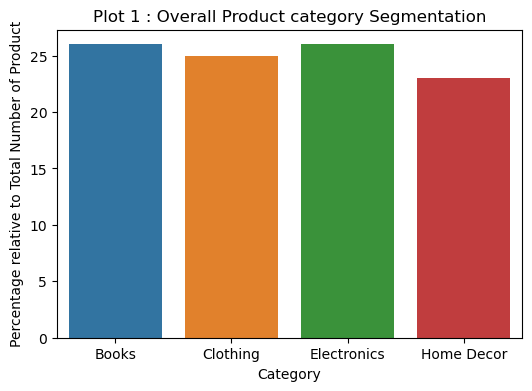

In [34]:
# Visualize the above observation
plt.figure(figsize=(6,4))

ax = sns.barplot(data=cust_group_df,x='Category',y='Percentage of Total Product')
ax.set_title('Plot 1 : Overall Product category Segmentation',fontsize=12)
ax.set_ylabel("Percentage relative to Total Number of Product",fontsize=10)
ax.tick_params(labelsize=10)
plt.show()


# Observation: "Books and Electronics" has same %26 percent and same #no of product wherein "Clothing" has 1% decrease and "Home Decor" has around %3 decrease when compared to other two category.

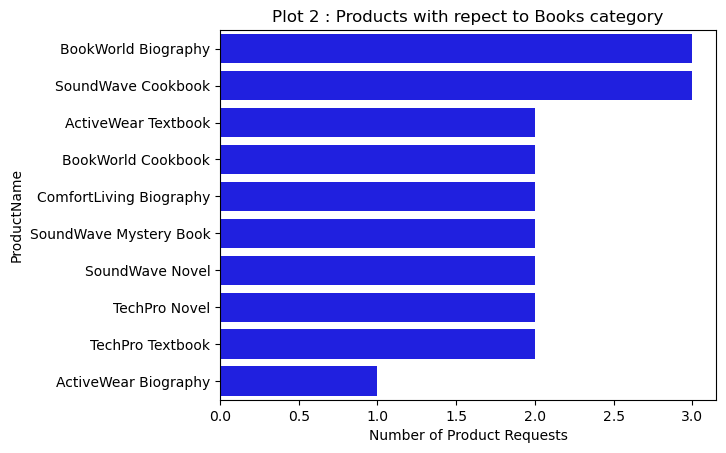

In [43]:
# Check the top 10 ProductName with most Books catgory.
driver1 = pd.DataFrame(product_df[product_df.Category=='Books'].groupby('ProductName').size()).reset_index().rename(columns={0:'Number of Product Requests'})
top_10_driver_cancellation1 = driver1.sort_values('Number of Product Requests',ascending=False).head(10)

ax = sns.barplot(data=top_10_driver_cancellation1,y='ProductName',x='Number of Product Requests',color='b')
ax.set_title('Plot 2 : Products with repect to Books category',fontsize=12)
plt.show()

# Plot 2 - Observation:
           # Plot 2. Books category "BookWorld Biography and SoundWave Cookbook" are performaing more no of the products when compared to other products.

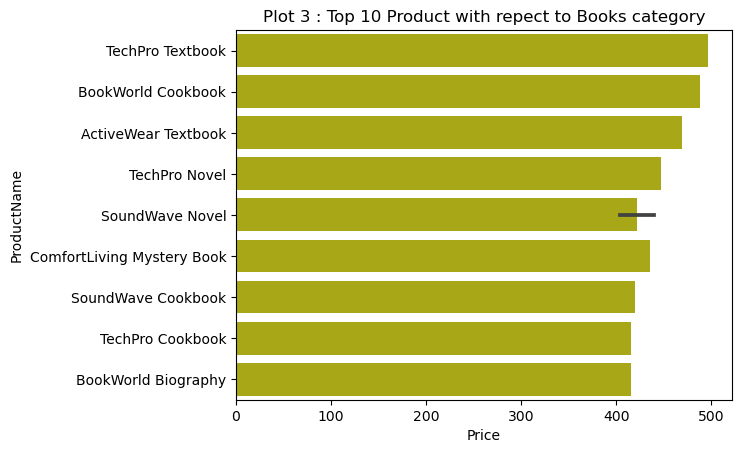

In [60]:
# Check the top 10 Price values with respect to Books catgory.
driver3 = pd.DataFrame(product_df[product_df.Category=='Books'])
top_10_driver_cancellation3 = driver3.sort_values('Price',ascending=False).head(10)

ax = sns.barplot(data=top_10_driver_cancellation3,y='ProductName',x='Price',color='y')
ax.set_title('Plot 3 : Top 10 Product with repect to Books category',fontsize=12)
plt.show()

# Plot 3 - Observation:
           # Plot 3. Top 10 Product based on the "Books" category among all "TechPro Textbook" carries around 500 price value and "BookWorld Cookbook" represent around 490 price value, and performing very good.

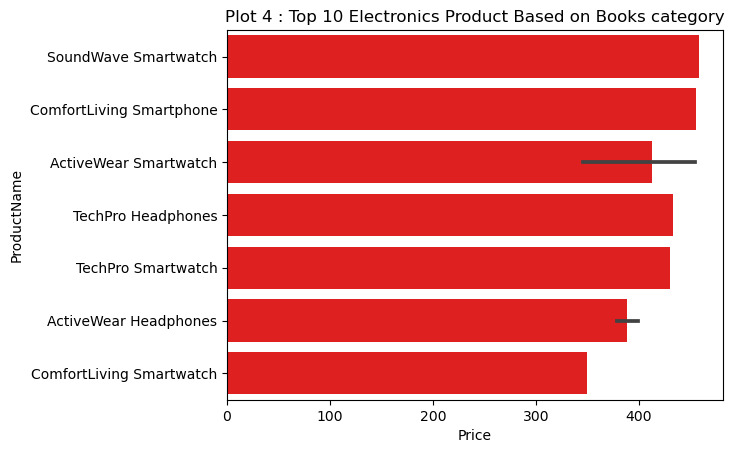

In [65]:
# Check the top 10 Price values with respect to Electronics catgory.
driver4 = pd.DataFrame(product_df[product_df.Category=='Electronics'])
top_10_driver_cancellation4 = driver4.sort_values('Price',ascending=False).head(10)

ax = sns.barplot(data=top_10_driver_cancellation4,y='ProductName',x='Price',color='r')
ax.set_title('Plot 4 : Top 10 Electronics Product Name',fontsize=12)
plt.show()

# Plot 4 - Observation:
           # Plot 4. Top 10 Electronics Product based on price among all "SoundWave Smartwatch", "ComfortLiving Smartphone" and "ActiveWear Smartwatch" represent around 460 price value performing good amount of value across.

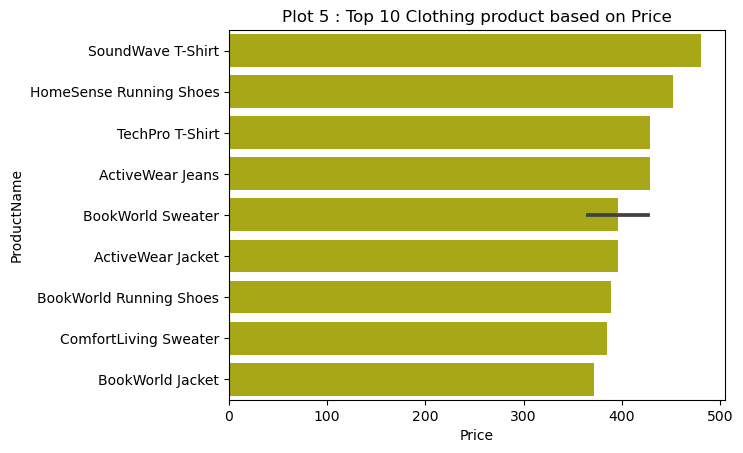

In [69]:
# Check the top 10 Price values with respect to Clothing catgory.
Clothg = pd.DataFrame(product_df[product_df.Category=='Clothing'])
top_10_Clothg_prod = Clothg.sort_values('Price',ascending=False).head(10)

ax = sns.barplot(data=top_10_Clothg_prod,y='ProductName',x='Price',color='y')
ax.set_title('Plot 5 : Top 10 Clothing product based on Price',fontsize=12)
plt.show()

##### Plot 5 - Observation:
           # Plot 4. Top 10 Clothing Product based on price among all "SoundWave T-Shirt" carries 481 and "HomeSense Running Shoes" represent around 452 price value performing good amount of value across.

In [68]:
# Sort by 'Price' column in descending order
driver2 = pd.DataFrame(product_df[product_df.Category=='Clothing'])
product_df_sort = driver2.sort_values(by='Price', ascending=False)
product_df_sort.head(10)

,ProductID,ProductName,Category,Price
44,P045,SoundWave T-Shirt,Clothing,481
63,P064,HomeSense Running Shoes,Clothing,452
4,P005,TechPro T-Shirt,Clothing,429
75,P076,ActiveWear Jeans,Clothing,429
64,P065,BookWorld Sweater,Clothing,427
19,P020,ActiveWear Jacket,Clothing,396
91,P092,BookWorld Running Shoes,Clothing,389
18,P019,ComfortLiving Sweater,Clothing,385
35,P036,BookWorld Jacket,Clothing,372
45,P046,BookWorld Sweater,Clothing,366


# Import the Transaction Data

In [71]:
#Load Transaction Report
Trans_df = pd.read_csv('C://Users/krivijay/OneDrive - Hewlett Packard Enterprise/Desktop/Vijay/Personal/Zeotap-Intermship-Data Science/Dataset/Transactions.csv')
Trans_df


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [72]:
#Check for Null Value
Trans_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [74]:
#Check for Duplicate
Trans_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [84]:
#Duplciate Rows
Trans_df[Trans_df.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [85]:
#Duplciated Count
Trans_df.duplicated().sum()

0

In [86]:
Trans_df.dropna()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [88]:
Trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
